### KMeans

In [2]:
# 패키지 불러오기
import pandas as pd

# 데이터 읽기
student_data = pd.read_excel('./data/ex1.xls')

# 데이터 개요 살펴보기
display(student_data.head())

,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13
1,FSS2010,Tanja Becker,Database Systems I,2.0,12
2,FSS2010,Mariano Selina,Database Systems I,1.7,5
3,FSS2010,Otto Blacher,Database Systems I,2.3,13
4,FSS2010,Frank Fester,Database Systems I,2.0,13


In [3]:
# 이름으로 그룹핑하여 평균값 구하기
students = student_data.groupby('Name').mean()

# 다시 데이터 살펴보기 
display(students.head())

,Mark,Attended
Name,,
Alex Krausche,1.325,12.500000
Avid Morvita,3.100,11.333333
Frank Fester,2.200,11.600000
Mariano Selina,1.680,6.200000
Michaela Martke,3.660,7.400000


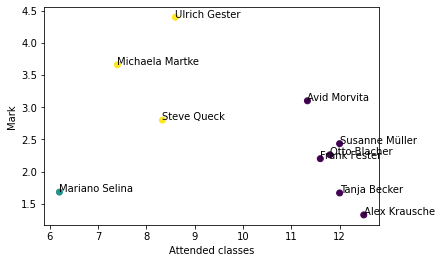

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# k=3 클러스터 생성
estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(students)

# 플롯
plt.scatter(students['Attended'], students['Mark'], c=cluster_ids)
plt.xlabel("Attended classes")
plt.ylabel("Mark")

# 범례 달기
for name, mark, attended in students.itertuples():
    plt.annotate(name, (attended, mark))
    
plt.show()

### Hierarchical

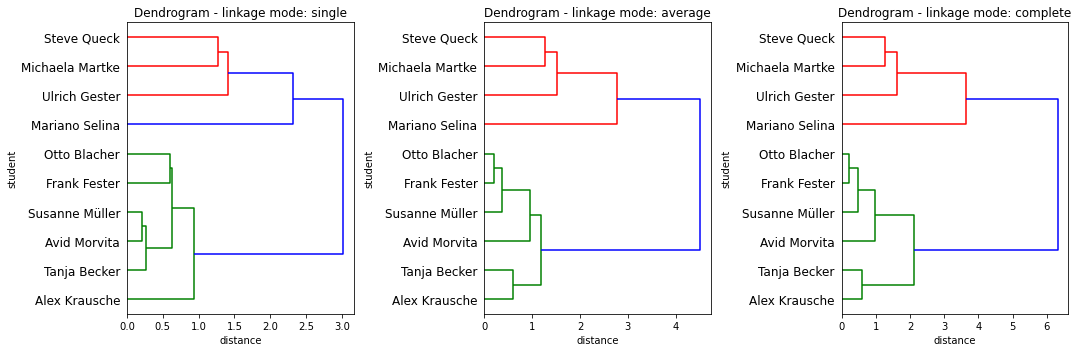

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 최단연결법은 single, 평균연결법은 average, 최장연결법은 complete으로 표기한다.
modes = ['single', 'average', 'complete']

plt.figure(figsize=(20,5))

# subplot() 함수를 사용하여 서브 플롯을 추가하고 반환 값을 y_axis라는 변수에 할당
# sharey 매개 변수를 사용하여 서브 플롯에 대한 모든 호출에 이 변수를 전달하여 모든 플롯이 동일한 y 축 사용
y_axis = None

# 모든 linkage mode 반복 생성
for i, mode in enumerate(modes):
    # 서브플롯 추가, y축은 공유
    y_axis = plt.subplot(1, 4, i + 1, sharey = y_axis)
    
    # 레이블링
    plt.title('Dendrogram - linkage mode: {}'.format(mode))
    plt.xlabel('distance')
    plt.ylabel('student')
    
    # 클러스터링
    clustering = linkage(students[['Mark', 'Attended']], mode)
    
    # 덴드로그램
    dendrogram(clustering, labels=list(students.index), orientation='right')
plt.tight_layout()
plt.show()